In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds



In [ ]:
train

tensorflow_datasets.image_classification.food101.Food101

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Gender"]=df["Gender"].replace(np.nan,1)
df["Gender"].unique()

array([1, 0, 2])

In [ ]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].replace(0,df["CoapplicantIncome"].mean())
df["CoapplicantIncome"].unique()

array([1.62124580e+03, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [ ]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,df["LoanAmount"].mean())
df["LoanAmount"].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

In [ ]:
df['loanAmount_log']= np.log(df['LoanAmount'])


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log        0
dtype: int64

In [ ]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])


In [ ]:
df['Gender'].fillna(df ['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df.loanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log. fillna(df.loanAmount_log.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-58-b656cd069804>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.loanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()


In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([[1, 'No', '0', ..., 1.0, 4.986425672954842, 7470.245798027101],
       [1, 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       [1, 'Yes', '0', ..., 1.0, 4.189654742026425, 4621.245798027101],
       ...,
       [1, 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       [1, 'Yes', '2', ..., 1.0, 5.231108616854587, 9204.245798027101],
       [0, 'No', '0', ..., 0.0, 4.890349128221754, 6204.245798027101]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

<ipython-input-62-06d31ceb1576>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married',data=df,palette='Set3')


Number of people who take loan as group by martial status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

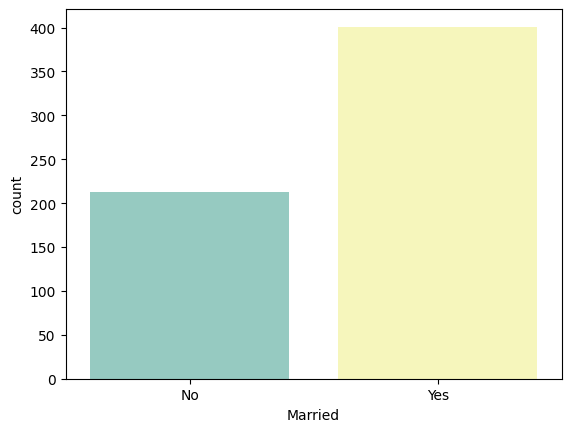

In [ ]:
print("Number of people who take loan as group by martial status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set3')

Number of people who take loan as group by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-63-da37ad6ee5a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents',data=df,palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

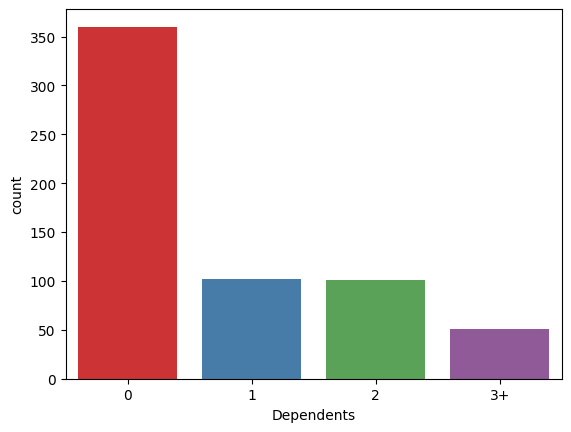

In [ ]:
print("Number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

Number of people who take loan as group by self employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-64-e375ee788661>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed',data=df,palette='Set2')


<Axes: xlabel='Self_Employed', ylabel='count'>

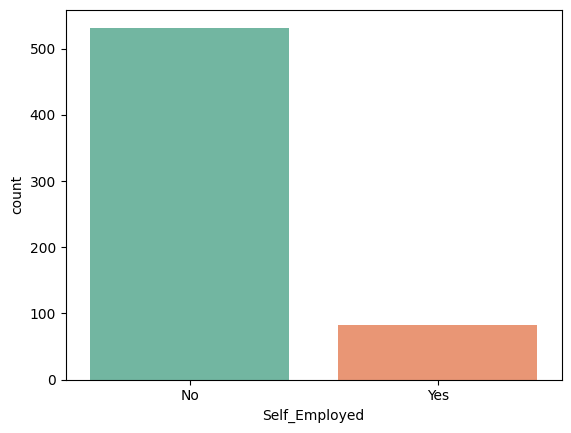

In [ ]:
print("Number of people who take loan as group by self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set2')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state= 0)
from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder ()

In [ ]:
X_train

array([[1, 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       [1, 'No', '1', ..., 1.0, 5.278114659230517, 12871.245798027101],
       [1, 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       [1, 'Yes', '0', ..., 1.0, 5.075173815233827, 7654.245798027101],
       [0, 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [ ]:
for i in range(0, 5):
 X_train[:,i]=Labelencoder_x.fit_transform (X_train[:,i])
 X_train[:,7]= Labelencoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 225],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 422],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 207],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 354],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 333],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 276]], dtype=object)

In [ ]:
Labelencoder_y = LabelEncoder ()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
 X_test[:,i]= Labelencoder_x.fit_transform (X_test[:,i])
 X_test[:,7]= Labelencoder_x.fit_transform (X_test[:,7])
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 95],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 62],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 101],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 74],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 7],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 64],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 89],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 116],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 73],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 44],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 21],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 18],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 100],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 94],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 119],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 53],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 15],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 10],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 11],
       [1

In [ ]:
Labelencoder_y = LabelEncoder ()
y_test= Labelencoder_y.fit_transform(y_test)
y_test



array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 225],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 422],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 207],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 354],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 333],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 276]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
X_train= ss.fit_transform (X_train)
X_test= ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit (X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print("acc of random forest clf is", metrics.accuracy_score(y_pred, y_test))


acc of random forest clf is 0.7886178861788617


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit (X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =dt_clf.predict(X_test)
print("acc of DT is", metrics.accuracy_score(y_pred, y_test))

acc of DT is 0.7073170731707317


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=1,random_state=42)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=1, random_state=42)

In [ ]:
y_pred_ad=ada_clf.predict(X_test)
acc = metrics.accuracy_score(y_pred_ad,y_test)
acc


0.8292682926829268

from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print("acc of bagging classifier is",metrics.accuracy_score(y_pred1,y_test))



acc of bagging classifier is 0.7154471544715447


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print("acc of KNN is",metrics.accuracy_score(y_pred1,y_test))


acc of KNN is 0.7886178861788617


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print("acc of Gradient boosting is",metrics.accuracy_score(y_pred1,y_test))

acc of Gradient boosting is 0.7804878048780488


In [ ]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
print("acc of Ridge classifier is",metrics.accuracy_score(y_pred1,y_test))

acc of Ridge classifier is 0.8292682926829268


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Classifier as the base classifier
base_classifier = RidgeClassifier()

# Combine the base classifier with AdaBoost using SAMME algorithm
adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_classifier,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME'  # Use 'SAMME' instead of 'SAMME.R'
)

# Fit the AdaBoost model on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, predictions)
print(f"AdaBoost + Ridge Classifier Accuracy: {accuracy:.4f}")

AdaBoost + Ridge Classifier Accuracy: 0.8600


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.845
